In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install ntscraper
from ntscraper import Nitter

# Scrapping news from the Twitter

In [6]:
import pandas as pd
from ntscraper import Nitter
scraper = Nitter()
tweets = scraper.get_tweets('Balen',mode = "hashtag",number = 799)
all_tweets = []
for i in tweets['tweets']:
  all_tweets.append(i['text'])

final_my_tweet = ['Tweets']+list(all_tweets)
final_my_tweet

Testing instances: 100%|██████████| 30/30 [00:56<00:00,  1.89s/it]


['Tweets',
 'घरपालुवा कुकुरलाई सार्वजनिक स्थानमा शौच गराउनेलाई काठमाडौँ महानगरपालिकाले कारबाही सुरु गरेको छ। #samayasandarva #kathmandu #balen https://samayasandarva.com/2024/01/09/7244/',
 '#balen जस्तै काठमाडौ जिल्लाका अन्य नगरपालिकाको आँखा कहिले खुल्ला ? घर पालुवा भन्दा नि भुस्या कुकुरहरुको नियन्त्रण होस !!',
 '[PHOTO] 240108 | Lee Donghun Instagram Update [1/3]  PETFLIX🐶 📷 https://www.instagram.com/p/C11qXadLf_0/ #ACE #에이스 @official_ACE7 #LeeDonghun #이동훈 #Balen #발렌',
 'Net kickbokstraining gehad. Maar het ging gewoon kut. Voel me niet happy. Sinds ik die “vriendschap” verbroken heb merk ik hoeveel stress ik ervan had. Dat moet ik kwijt zien te raken maar t gaat niet snel genoeg #balen #frustratie',
 'Pfff… voor de derde keer in 4 maanden snotverkouden. Met dank aan iemand die het nodig vond om doodziek op de manege  rond te lopen!! Slijm in al mijn bronchiën! Gelukkig vandaag weer ietsje fitter. Dus hopelijk knap ik nu snel weer op!! #BeetjeJammer #Balen',
 'Never let it to go #bal

In [7]:
# Text pre-processing
import re,string
def get_normalize(text):
    text = re.sub(r'\&\w*;','',text)
    text = re.sub('@[^\s]+','',text)
    text = re.sub(r'\$\w*','',text)
    text = text.lower()
    text = re.sub(r'https?:\/\/.*\/\w*','',text)
    text = re.sub(r'#\w*','',text)
    text = re.sub(r'[' + string.punctuation.replace('@','') + ']+',' ',text)
    text = re.sub(r'\b\w{1,2}\b','',text)
    text = re.sub(r'\s\s+',' ',text)
    text = re.sub("[^a-zA-Z]", " ", text)
    text = text.lstrip(' ')
    text = ''.join(c for c in text if c <= '\uFFFF')
    return text
j = 0
for i in final_my_tweet:
  final_my_tweet[j]=get_normalize(str(i))
  j = j+1
final_my_tweet



['tweets',
 '',
 '',
 'photo        lee donghun instagram update petflix    ',
 'net kickbokstraining gehad maar het ging gewoon kut voel niet happy sinds die  vriendschap  verbroken heb merk hoeveel stress ervan had dat moet kwijt zien raken maar gaat niet snel genoeg ',
 'pfff  voor derde keer maanden snotverkouden met dank aan iemand die het nodig vond doodziek manege rond lopen slijm mijn bronchi n gelukkig vandaag weer ietsje fitter dus hopelijk knap snel weer ',
 'never let ',
 'nou dat was een fiasco dacht kan wel door pijn heen dansen maar nee ging toch niet ',
 'hemoroid do ru beslenme bol s v  al m  lifli besinlerle desteklenmesi gereken bir rahats zl kt r  daha sonra incelemek i in kaydetmeyi g rmesini istedi in arkada  na g ndermeyi unutma sipari  i in ',
 'wanneer akkoord hebt gegeven kostenopgave crematie denkt voor     extra bidprentjes moeten bijbetalen het blijkt niet zijn uiteindelijk maar     prentjes hebt voor     personen dan       serieus ',
 'ben niet veel beter 

# Writing in a CSV file.

In [9]:
b = open('balentweets.csv', 'w') #open() is a function for file handling #my_tweets.csv is an argument that creates a csv file #'w' is a mode to overwrite on the created file
for i in final_my_tweet:
  b.write(f"{i}\n") #.write is a function that writes each and every string or element from the list on to the created file #(f"{i}\n) is an argument for string formatting #'f' is a keyword
                    # used for string formatting #{i}: if you want to format a variable within a string, you must use curly brackets.

                    #here, 'i' is a variable that denotes each element in the list. #\n pushes to go to the next line in the csv file after each element is formatted and written.
b.close()           #b.close() closes the opened file.

In [10]:
import pandas as pd 
df = pd.read_csv('balentweets.csv', usecols=['tweets'])
df


,tweets
0,photo lee donghun instagram update petf...
1,net kickbokstraining gehad maar het ging gewoo...
2,pfff voor derde keer maanden snotverkouden me...
3,never let
4,nou dat was een fiasco dacht kan wel door pijn...
...,...
522,rupa lake discover pokhara serene gem
523,stuurde juni via een belangrijke daarom aanget...
524,bro constitution vane kura hunxa country chaly...
525,good job


In [11]:
df = df[df['tweets'] != '']

In [12]:
df

,tweets
0,photo lee donghun instagram update petf...
1,net kickbokstraining gehad maar het ging gewoo...
2,pfff voor derde keer maanden snotverkouden me...
3,never let
4,nou dat was een fiasco dacht kan wel door pijn...
...,...
522,rupa lake discover pokhara serene gem
523,stuurde juni via een belangrijke daarom aanget...
524,bro constitution vane kura hunxa country chaly...
525,good job


In [14]:
data = df
new_data = data.drop_duplicates(subset="tweets") #to drop retweets and repeated rows #subset is a keyword in pandas with column value as "Tweets" to indicate the column with duplicate text
new_data.to_csv('/kaggle/working/filtered_content.csv')
new_data

,tweets
0,photo lee donghun instagram update petf...
1,net kickbokstraining gehad maar het ging gewoo...
2,pfff voor derde keer maanden snotverkouden me...
3,never let
4,nou dat was een fiasco dacht kan wel door pijn...
...,...
522,rupa lake discover pokhara serene gem
523,stuurde juni via een belangrijke daarom aanget...
524,bro constitution vane kura hunxa country chaly...
525,good job


# Sentiment Classifying using Textblob

In [75]:
from textblob import TextBlob

new_data[['Polarity', 'Subjectivity']] = new_data['tweets'].apply(
    lambda Text: pd.Series(TextBlob(Text).sentiment))
new_data


/tmp/ipykernel_42/3354968942.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data[['Polarity', 'Subjectivity']] = new_data['tweets'].apply(


,tweets,Polarity,Subjectivity
0,photo lee donghun instagram update petf...,0.000,0.000000
1,net kickbokstraining gehad maar het ging gewoo...,0.400,0.500000
2,pfff voor derde keer maanden snotverkouden me...,0.000,0.000000
3,never let,0.000,0.000000
4,nou dat was een fiasco dacht kan wel door pijn...,0.000,0.000000
...,...,...,...
522,rupa lake discover pokhara serene gem,0.000,0.000000
523,stuurde juni via een belangrijke daarom aanget...,0.000,0.333333
524,bro constitution vane kura hunxa country chaly...,-0.275,0.625000
525,good job,0.700,0.600000


In [76]:
y = new_data['Polarity']
positive = 0
negative = 0
neutral = 0

for a in y:
    if a>0:
     positive=positive+1
    elif a<0:
     negative=negative+1
    else:
     neutral=neutral+1
numberOfTweetsAnalysed= positive+negative+neutral
print('Number of Tweets Analysed = '+str(numberOfTweetsAnalysed))
print('Positive tweets = '+str(positive))
print('Negative tweets = '+str(negative))
print('Neutral tweets = '+str(neutral))



Number of Tweets Analysed = 473
Positive tweets = 91
Negative tweets = 33
Neutral tweets = 349


In [82]:

new_data['Polarity'] = df['Polarity'].apply(lambda x: 'Negative' if x < 0 else ('Positive' if x > 1 else 'Neutral'))


/tmp/ipykernel_42/4070546517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Polarity'] = df['Polarity'].apply(lambda x: 'Negative' if x < 0 else ('Positive' if x > 1 else 'Neutral'))


# Seperating Training and Testing Data

In [83]:
import pandas as pd
import numpy as np
import pickle
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from sklearn.preprocessing import LabelBinarizer
import sklearn.datasets as skds
from pathlib import Path
# lets take 80% data as training and remaining 20% for test.
df=new_data
train_size = int(len(df) * .8)

train_posts = df['tweets'][:train_size]
train_tags = df['Polarity'][:train_size]


test_posts = df['tweets'][train_size:]
test_tags = df['Polarity'][train_size:]


In [80]:
test_tags

421    0.000000
422    0.389286
423    0.000000
425    0.000000
426    0.050000
         ...   
522    0.000000
523    0.000000
524   -0.275000
525    0.700000
526    0.000000
Name: Polarity, Length: 95, dtype: float64

# Text Data Preprocessing

In [84]:
# 3 news groups
num_labels = 3
vocab_size = 100
batch_size = 10

# define Tokenizer with Vocab Size
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(train_posts)

x_train = tokenizer.texts_to_matrix(train_posts, mode='tfidf')

x_test = tokenizer.texts_to_matrix(test_posts, mode='tfidf')
print(len(x_test[0]))
print(x_test)
encoder = LabelBinarizer()
encoder.fit(train_tags)
from keras.utils import to_categorical

# # Assuming y_train is a vector of integers representing class labels
# y_train = to_categorical(y_train, num_classes=num_labels)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

100
[[0.         0.         1.95964034 ... 0.         0.         0.        ]
 [0.         1.98787435 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         4.00733319 4.15888308]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [37]:
x_train

array([[0.        , 0.        , 1.95964034, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 3.31795952, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 3.31795952, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

# Defining Model Architecture

In [90]:

model = Sequential()
model.add(Dense(512, input_shape=(vocab_size,))) 
model.add(Activation('relu')) 
model.add(Dropout(0.3)) 

model.add(Dense(128)) 
model.add(Activation('relu')) 

model.add(Dense(64)) 
model.add(Activation('relu'))

model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(3))
model.add(Activation('softmax')) 

model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',  
              metrics=['accuracy'])

history = model.fit(x_train, y_train,    #fitting the model with the training set (x-train), y-train(training set data's tags encoded) The annotated dataset.
                    batch_size=32,
                    epochs=100,
                    verbose=1, #to randomize the data, not too important for this case.
                    validation_split=0.1) #split from the test set.

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 512)               51712     
                                                                 
 activation_56 (Activation)  (None, 512)               0         
                                                                 
 dropout_39 (Dropout)        (None, 512)               0         
                                                                 
 dense_57 (Dense)            (None, 128)               65664     
                                                                 
 activation_57 (Activation)  (None, 128)               0         
                                                                 
 dense_58 (Dense)            (None, 64)                8256      
                                                                 
 activation_58 (Activation)  (None, 64)              

In [91]:
model.save('balen_tweetanalysis.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Plotting Training_Loss and Validation_Loss

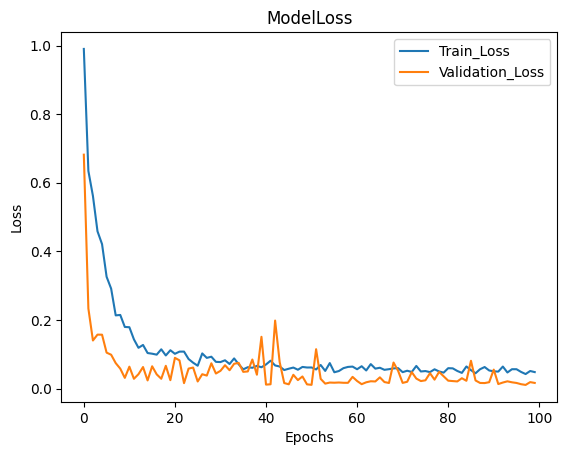

In [92]:
import matplotlib.pyplot as plt


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ModelLoss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train_Loss','Validation_Loss'],loc='upper right')
plt.show()

# Plotting Training_Accuracy and Validation_Accuracy

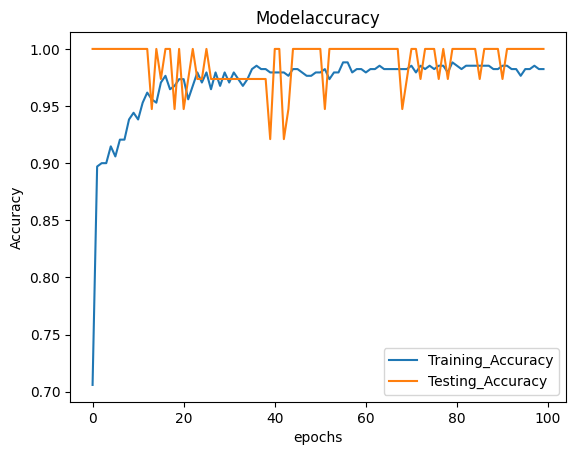

In [93]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Modelaccuracy")
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(['Training_Accuracy','Testing_Accuracy'])

# Predicting score

In [99]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1) #take same number of batches as taken suring training.

print('Test accuracy:', score[1]) #score[1] for one dimensional data. All data must be one-dimensional prior to entry into the NN
print(score)
text_labels = encoder.classes_ #to check how we have encoded the class of our categories, in order to test
print(text_labels)


for i in range(90): 
    prediction = model.predict(np.array([x_test[i]])) #we have changed news data to numpy array to fit the requirements of the predict function
    predicted_label = text_labels[np.argmax(prediction[0])] #argmax
    print(predicted_label)
    print(test_posts.iloc[i])
    print(prediction)
    print('Actual label:' + test_tags.iloc[i])
    print("Predicted label: " + predicted_label)

10/10 [==============================] - 0s 2ms/step - loss: 1.4488 - accuracy: 0.9263
Test accuracy: 0.9263157844543457
[1.4487581253051758, 0.9263157844543457]
['Negative' 'Neutral']
1/1 [==============================] - 0s 18ms/step
Neutral
video        donghun instagram story update with balen   
[[2.2981847e-14 1.0000000e+00 2.4676762e-33]]
Actual label:Neutral
Predicted label: Neutral
1/1 [==============================] - 0s 18ms/step
Neutral
dont see any changes bharatpur specially infrastructure cultural heritage and management the city   what kind weed switzerland govt having really more then deserves this award 
[[5.0088085e-12 1.0000000e+00 8.8487477e-28]]
Actual label:Neutral
Predicted label: Neutral
1/1 [==============================] - 0s 17ms/step
Neutral
rajdhani rastriya dainik asad      online nepali news portal                                                                          
[[4.0981707e-09 1.0000000e+00 4.7714831e-21]]
Actual label:Neutral
Predicted labe

In [70]:
x_test[0]

array([0.        , 0.        , 1.95964034, 1.8210079 , 0.        ,
       0.        , 2.01719923, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       3.09104245, 0.        , 3.20376219, 0.        , 0.        ,
       0.        , 0.        , 3.26575941, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 3.65842025, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     